In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Cleaning

In [2]:
# Reading merged data Arabica 98% and Robusta 2% of records
df_quality = pd.read_csv("data/merged_data_cleaned.csv")
df_quality.head()

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [3]:
################### Quality Measures - Features ####################
# Aroma
# Flavor
# Aftertaste
# Acidity
# Body
# Balance
# Uniformity
# Cup Cleanliness
# Sweetness
# Moisture
# Defects
################### Bean Metadata - Labels ####################
# Species (arabica / robusta)
# Country of Origin

df_quality = df_quality[['Country.of.Origin', 'Species', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 
                         'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness',
                         'Moisture', 'Category.One.Defects', 'Category.Two.Defects']]

In [4]:
# check for null values in data
df_quality.isnull().sum()

Country.of.Origin       1
Species                 0
Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean.Cup               0
Sweetness               0
Moisture                0
Category.One.Defects    0
Category.Two.Defects    0
dtype: int64

In [5]:
# From Data, it was evident that the only missing country was Columbia 
# because the Owner "racafe & cia s.c.a" has records in Columbia only 
# and In.Country.Partner column value "AlmacafÃ©" is only for Columbia and United States

df_quality['Country.of.Origin'] = df_quality['Country.of.Origin'].fillna('Colombia')
# Checking again for null values in 'Country.of.Origin' column
df_quality['Country.of.Origin'].isnull().sum()

0

Data is not fully normaly distributed. There is skewness. Algorithms will perform better with a normalized or scaled dataset.

There are outliers in data, so better to select Models which are insensitive to outliers like SVC, Decision Tree, and Ensembling Techniques

#   Adding Region Column to predict region instead of Countries

In [6]:
# Changing Country Names
df_quality.loc[(df_quality['Country.of.Origin'] == "United States"),'Country.of.Origin']='United States of America'
df_quality.loc[(df_quality['Country.of.Origin'] == "United States (Puerto Rico)"),'Country.of.Origin']='Puerto Rico'
df_quality.loc[(df_quality['Country.of.Origin'] == "Vietnam"),'Country.of.Origin']='Viet Nam'

In [7]:
import requests
# Getting Region data using API
# URL for GET requests to retrieve Region data of Countries from Rest Countries API
base_url = "https://restcountries.eu/rest/v2/name/"

# Defining a function to fetch each Contries Region with API
def fetchRegion(countries):

    country_list = []
    region_list = []
    not_found = []

    for country in countries:
        try:  
            # Appending country name to the base url
            url = f"{base_url}{country}?fullText=true"

            # Perform a get request for each country
            response = requests.get(url)

            # Storing the JSON response within a variable
            data = response.json()
            
            # Adding the region and country name to lists
            region_list.append(data[0]['subregion'])
            country_list.append(country)

        except:
            not_found.append(country)
    # function return all the list of values
    return country_list, region_list, not_found

In [8]:
# Creating a list of all countries from each years data
countries = df_quality['Country.of.Origin'].unique()

# Calling out the function to fetch regions of countries in countries list
country_list, region_list, not_found = fetchRegion(countries)

# Creating a data frame with the list values returned from the function
df_region = pd.DataFrame({"Country.of.Origin": country_list, "Region": region_list})

print(f"Countries Not Found: {not_found}")
df_region

Countries Not Found: ['United States (Hawaii)']


,Country.of.Origin,Region
0,Ethiopia,Eastern Africa
1,Guatemala,Central America
2,Brazil,South America
3,Peru,South America
4,United States of America,Northern America
5,Indonesia,South-Eastern Asia
6,China,Eastern Asia
7,Costa Rica,Central America
8,Mexico,Central America
9,Uganda,Eastern Africa


In [9]:
# Merging region with the coffee quality's data frame
merge_df = df_quality.merge(df_region, on="Country.of.Origin", how="left")

merge_df.loc[merge_df['Country.of.Origin'] == "United States (Hawaii)",'Region']='Northern America'
merge_df.loc[merge_df['Country.of.Origin'] == "United States (Hawaii)"]
merge_df.drop('Country.of.Origin', axis=1, inplace=True)

Central America       572
South America         329
Eastern Africa        161
Eastern Asia           92
Northern America       83
South-Eastern Asia     76
Southern Asia          14
Caribbean              10
Western Africa          1
Melanesia               1
Name: Region, dtype: int64

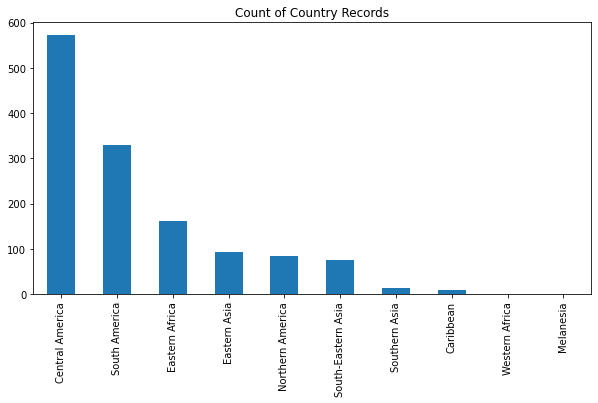

In [10]:
target_count = merge_df['Region'].value_counts()
fig = plt.figure(figsize=(10,5))
fig.patch.set_facecolor('white')
target_count.plot(kind='bar', title='Count of Country Records');
merge_df['Region'].value_counts()

In [11]:
merge_df = merge_df[~merge_df['Region'].isin(['Melanesia', 'Western Africa'])]
merge_df['Region'].value_counts()

Central America       572
South America         329
Eastern Africa        161
Eastern Asia           92
Northern America       83
South-Eastern Asia     76
Southern Asia          14
Caribbean              10
Name: Region, dtype: int64

In [12]:
# Label encodeing for Correlation Matrix
df_qual = merge_df.copy()
from sklearn.preprocessing import LabelEncoder

df_qual = df_qual.apply(LabelEncoder().fit_transform)

<AxesSubplot:>

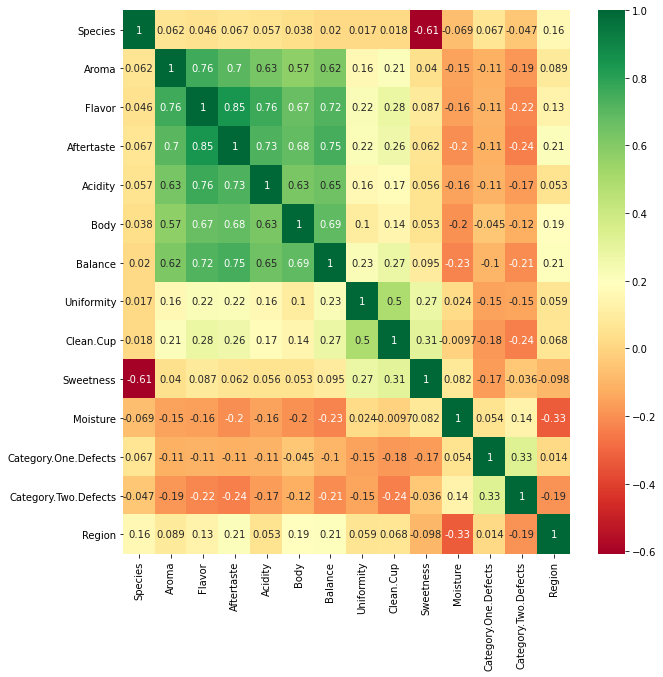

In [13]:
# correlation matrix
corr_mat = df_qual.corr()
top_corr_features = corr_mat.index
fig = plt.figure(figsize=(10,10))
fig.patch.set_facecolor('white')
# heatmap
sns.heatmap(df_qual[top_corr_features].corr(), annot=True, cmap="RdYlGn")

In [14]:
# From the Correlation heatmap we can see Flavor column is highly correlated to many other features
# So we can remove that feature from training the model. It improved overall accuracy by 2% 
# but after SMOTE it doesn't matter

merge_df.drop('Flavor', axis = 1, inplace = True) 
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1338
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Species               1337 non-null   object 
 1   Aroma                 1337 non-null   float64
 2   Aftertaste            1337 non-null   float64
 3   Acidity               1337 non-null   float64
 4   Body                  1337 non-null   float64
 5   Balance               1337 non-null   float64
 6   Uniformity            1337 non-null   float64
 7   Clean.Cup             1337 non-null   float64
 8   Sweetness             1337 non-null   float64
 9   Moisture              1337 non-null   float64
 10  Category.One.Defects  1337 non-null   int64  
 11  Category.Two.Defects  1337 non-null   int64  
 12  Region                1337 non-null   object 
dtypes: float64(9), int64(2), object(2)
memory usage: 146.2+ KB


In [15]:
# Set features. This will also be used as your x values.
X = merge_df.iloc[:, 0:12]
y = merge_df.iloc[:, 12]
print(X.shape, y.shape)

(1337, 12) (1337,)


In [16]:
# Label encoding
from sklearn.preprocessing import LabelEncoder

X_encoded = X.apply(LabelEncoder().fit_transform)

# Train Test Split

In [17]:
# Creating train test split on oversampled data
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X_encoded, y, random_state=13, test_size=0.1)

## Pre-processing
Scale and Normalize the data using the StandardScaler

In [18]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train_full)

# Transform the training and testing data using the X_scaler
X_train_scaled = X_scaler.transform(X_train_full)
X_test_scaled = X_scaler.transform(X_test)

#### Imbalanced Dataset
##### Synthethetic Minority Over sampling Technique (SMOTE)

In [19]:
# Over sampling
from imblearn.over_sampling import SMOTE

strategy_dict = {'Eastern Africa': 1500, 'Central America': 1500, 'Eastern Asia': 1500, 
                 'South America': 1500, 'South-Eastern Asia': 1500, 'Caribbean': 1500, 
                 'Northern America': 1500, 'Southern Asia': 1500}
synth = SMOTE(random_state=13, sampling_strategy=strategy_dict)
X_resampled, y_resampled = synth.fit_resample(X_train_scaled, y_train_full)

from collections import Counter
print("Before SMOTE count:" , Counter(y_train_full))
print("After SMOTE count:" , Counter(y_resampled))

Before SMOTE count: Counter({'Central America': 512, 'South America': 295, 'Eastern Africa': 146, 'Eastern Asia': 81, 'South-Eastern Asia': 73, 'Northern America': 73, 'Southern Asia': 13, 'Caribbean': 10})
After SMOTE count: Counter({'South-Eastern Asia': 1500, 'South America': 1500, 'Northern America': 1500, 'Caribbean': 1500, 'Central America': 1500, 'Eastern Asia': 1500, 'Eastern Africa': 1500, 'Southern Asia': 1500})


C:\Users\Abraham\anaconda3\envs\envcoffee\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (1500) in class Eastern Africa will be larger than the number of samples in the majority class (class #Central America -> 512)
  n_samples_majority,
C:\Users\Abraham\anaconda3\envs\envcoffee\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (1500) in class Central America will be larger than the number of samples in the majority class (class #Central America -> 512)
  n_samples_majority,
C:\Users\Abraham\anaconda3\envs\envcoffee\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (1500) in class Eastern Asia will be larger than the number of samples in the majority class (class #Central America -> 512)
  n_samples_majority,
C:\Users\Abraham\anaconda3\envs\envcoffee\lib\site-packages\imblearn\utils\_validation.py:326: UserWa

## Create a Train Validation Split After SMOTE

In [20]:
# Creating train test split on oversampled data
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, random_state=13, test_size=0.2)

# Train the Model using SVC

In [21]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_val, y_val)}")

Training Data Score: 0.5611458333333333
Testing Data Score: 0.5566666666666666


## Evaluate the Model using Confusion Matrix

Confusion matrix:
 [[227   0   0  34  50   0   5   0]
 [ 14 163  48  24  15  18  17   0]
 [  1  68 152  25  19  15   9   0]
 [ 33  20  28 166  22  33  18   0]
 [ 22  27   3  24 187  29   9   0]
 [ 15  38  79  30  46  78  34   0]
 [ 23  33  45  47  23  21  80   0]
 [  0   0   0   0   0   0   0 283]]


C:\Users\Abraham\anaconda3\envs\envcoffee\lib\site-packages\ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app
C:\Users\Abraham\anaconda3\envs\envcoffee\lib\site-packages\ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()


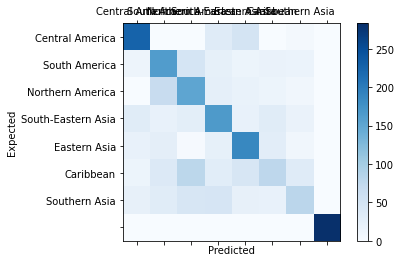

In [22]:
# Make predictions with the model
predictions = model.predict(X_val)  

from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_true=y_val, y_pred=predictions)
print('Confusion matrix:\n', conf_mat)

labels = merge_df['Region'].unique()
fig = plt.figure()
fig.patch.set_facecolor('white')
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

### Hyperparameter Tuning for SVC Model

In [23]:
# # Create the GridSearch estimator along with a parameter object containing the values to adjust
# from sklearn.model_selection import GridSearchCV
# param_grid = {'C': [50,100],
#               'kernel': ['rbf','linear'],
#               'gamma': [0.001, 0.01]}
# grid = GridSearchCV(model, param_grid, cv=5)

In [24]:
# # Train the model with GridSearch
# # This will take the SVC model and try each combination of parameters

# grid.fit(X_train, y_train)

# print(grid.best_params_)
# print(grid.best_score_)

# Decision Tree Model

In [25]:
from sklearn import tree

# Create and score a decision tree classifier
clfTree = tree.DecisionTreeClassifier(min_samples_split=4)
clf = clfTree.fit(X_train, y_train)

# Make predictions with the hypertuned model
treePredictions = clf.predict(X_val)
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_val, treePredictions))

                    precision    recall  f1-score   support

         Caribbean       0.96      0.98      0.97       316
   Central America       0.70      0.75      0.72       299
    Eastern Africa       0.82      0.81      0.81       289
      Eastern Asia       0.90      0.91      0.91       320
  Northern America       0.95      0.93      0.94       301
     South America       0.79      0.77      0.78       320
South-Eastern Asia       0.89      0.84      0.86       272
     Southern Asia       1.00      1.00      1.00       283

          accuracy                           0.87      2400
         macro avg       0.87      0.87      0.87      2400
      weighted avg       0.87      0.87      0.87      2400



In [26]:
print(f"Test Accuracy: {clf.score(X_test_scaled, y_test)}")

Test Accuracy: 0.4701492537313433


# Random Forest Grid Search

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

model_params = {
    'model': RandomForestClassifier(random_state=13),
    'params' : {
        'n_estimators': [100],  # no of trees
        'min_samples_split':[3, 4],
        'max_samples': [0.2, 0.5]
    }
}

RFclf =  GridSearchCV(model_params['model'], model_params['params'], cv=4, n_jobs=-1, return_train_score=False)
RFclf.fit(X_train, y_train)

print(RFclf.best_params_)
print(RFclf.best_score_)

{'max_samples': 0.5, 'min_samples_split': 3, 'n_estimators': 100}
0.9257291666666667


In [28]:
print(f"Train Accuracy: {RFclf.score(X_train, y_train)}")
print(f"Validation Accuracy: {RFclf.score(X_val, y_val)}")

Train Accuracy: 0.9973958333333334
Validation Accuracy: 0.9491666666666667


In [29]:
print(f"Test Accuracy: {RFclf.score(X_test_scaled, y_test)}")

Test Accuracy: 0.5373134328358209


# Save the Random Forest model

In [30]:
import joblib
joblib.dump(RFclf, 'models/model_region.sav')

['models/model_region.sav']

In [31]:
joblib.dump(X_scaler, 'models/model_region_scaler.sav')

['models/model_region_scaler.sav']